In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import(LinearRegression, 
                                 Lasso, 
                                 Ridge,
                                 ElasticNet)
from sklearn.ensemble import(RandomForestRegressor, 
                            GradientBoostingRegressor, 
                            AdaBoostRegressor)
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [110]:

# pip install xgboost

In [111]:
df=pd.read_csv('insurance.csv')

In [112]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [113]:
df.shape

(1338, 7)

In [114]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [115]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [117]:
num_col=numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [118]:
num_col

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [119]:
cat_col=df.select_dtypes(include=['object']).columns

In [120]:
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

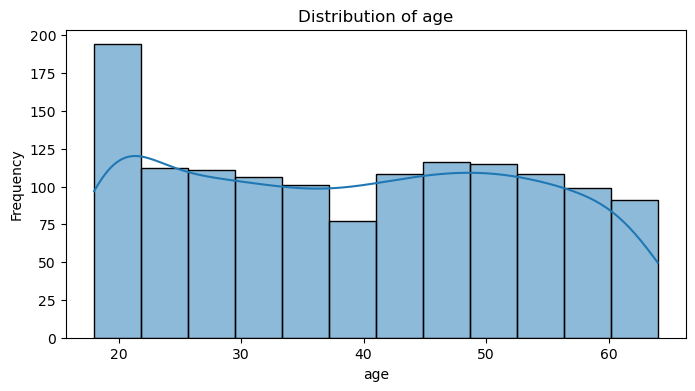

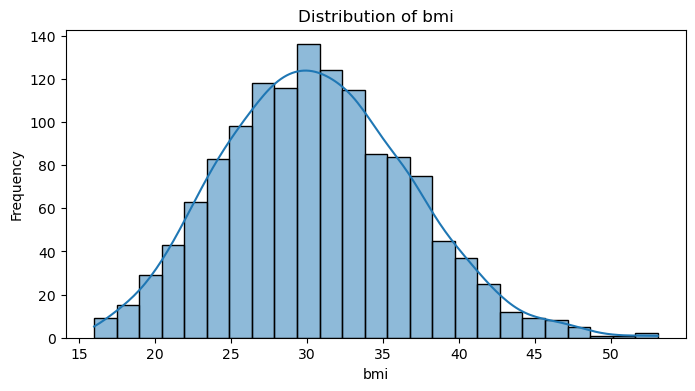

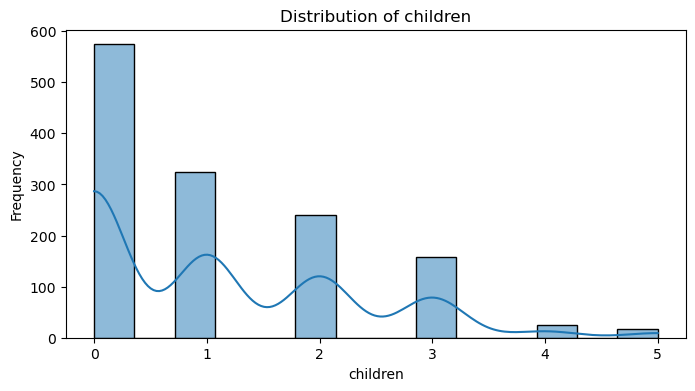

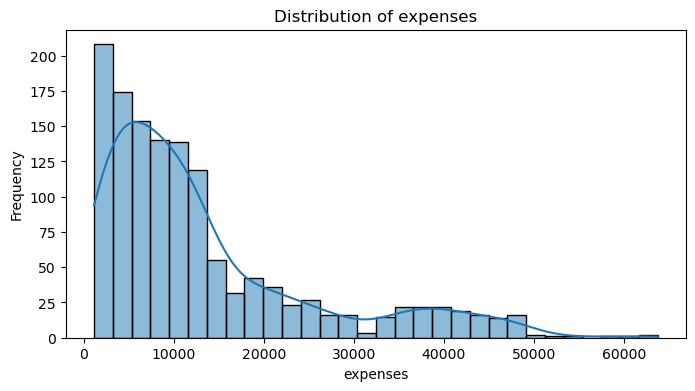

In [121]:
for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##age is uniformly distributed

##bmi is normally distributed

##there are more people having no children and the graph decreases as shown above distribution

#lower expenses people are present more in number and data is right skewed.

#the above mentioned columns were alll numerical.

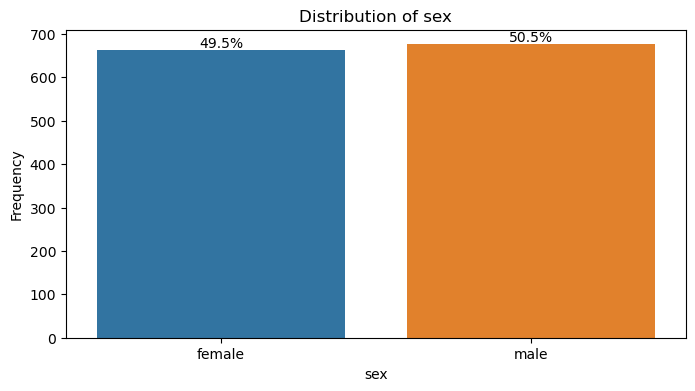

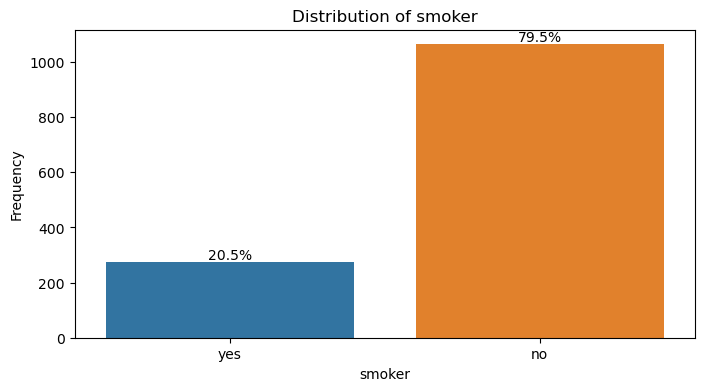

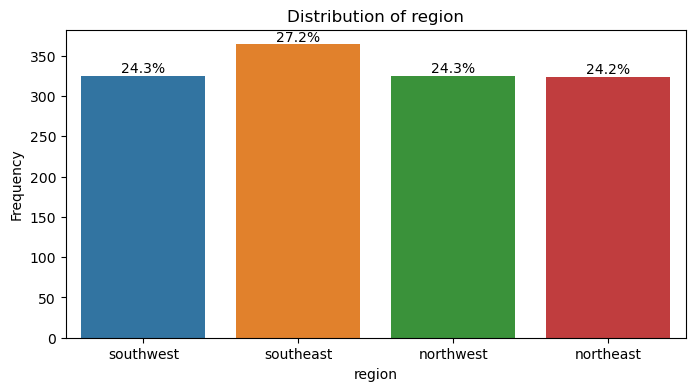

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'cat_col' is a list of categorical columns
cat_col = ['sex', 'smoker', 'region']

# Create count plots with percentages for each categorical column
for col in cat_col:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col)
    
    # Calculate total count and percentages
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


##above shown graphs are for categorical columns sex,smoker and region with their percentages described in plots

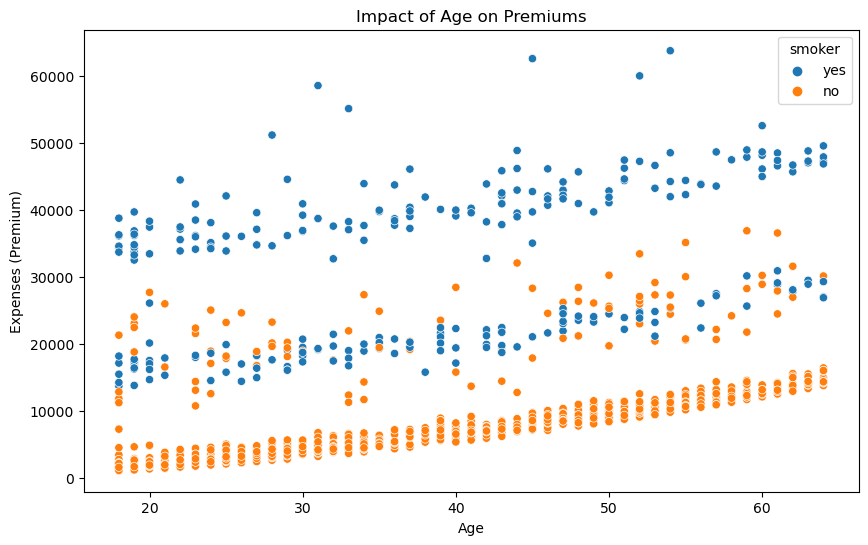

Correlation between Age and Premiums: 0.30


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
# sns.regplot(data=df, x='age', y='expenses', scatter_kws={'s':50}, line_kws={'color':'red'})
sns.scatterplot(data=df,x='age',y='expenses',hue='smoker')

plt.title('Impact of Age on Premiums')
plt.xlabel('Age')
plt.ylabel('Expenses (Premium)')

plt.show()

# Calculate correlation
corr_age_expenses = df['age'].corr(df['expenses'])
print(f'Correlation between Age and Premiums: {corr_age_expenses:.2f}')


With the increase in age the expenses also increases,there is a positive correlation and expenses are mostly more for people who smoke.

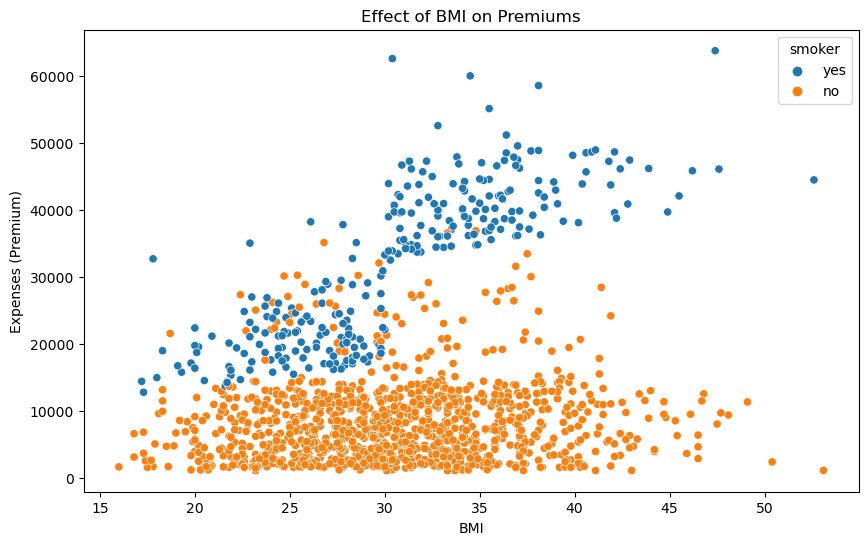

Correlation between BMI and Premiums: 0.20


In [124]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker')
plt.title('Effect of BMI on Premiums')
plt.xlabel('BMI')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate correlation
corr_bmi_expenses = df['bmi'].corr(df['expenses'])
print(f'Correlation between BMI and Premiums: {corr_bmi_expenses:.2f}')


there is a positive correlation not really noticeable but exisis between bmi and expenses and smokers have really more expenses

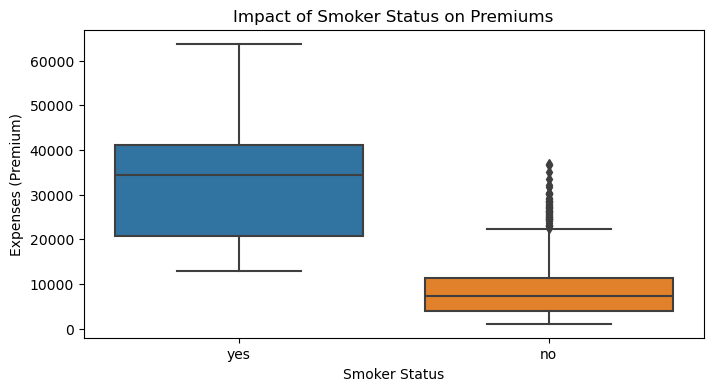

Mean Premiums by Smoker Status:
smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64


In [125]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='smoker', y='expenses')
plt.title('Impact of Smoker Status on Premiums')
plt.xlabel('Smoker Status')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate mean expenses by smoker status
mean_expenses_by_smoker = df.groupby('smoker')['expenses'].mean()
print('Mean Premiums by Smoker Status:')
print(mean_expenses_by_smoker)


Smokers have high expenses than non smokers

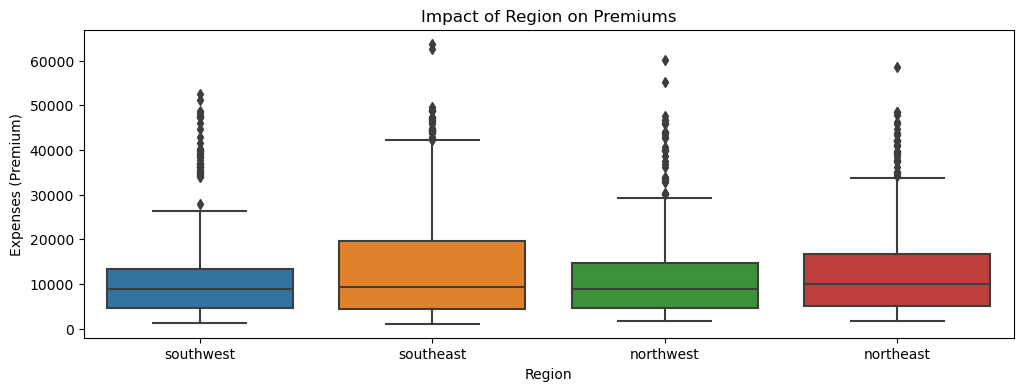

Mean Premiums by Region:
region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64


In [126]:
# Box plot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='region', y='expenses')
plt.title('Impact of Region on Premiums')
plt.xlabel('Region')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate mean expenses by region
mean_expenses_by_region = df.groupby('region')['expenses'].mean()
print('Mean Premiums by Region:')
print(mean_expenses_by_region)


South east region people pay more premiums than the rest

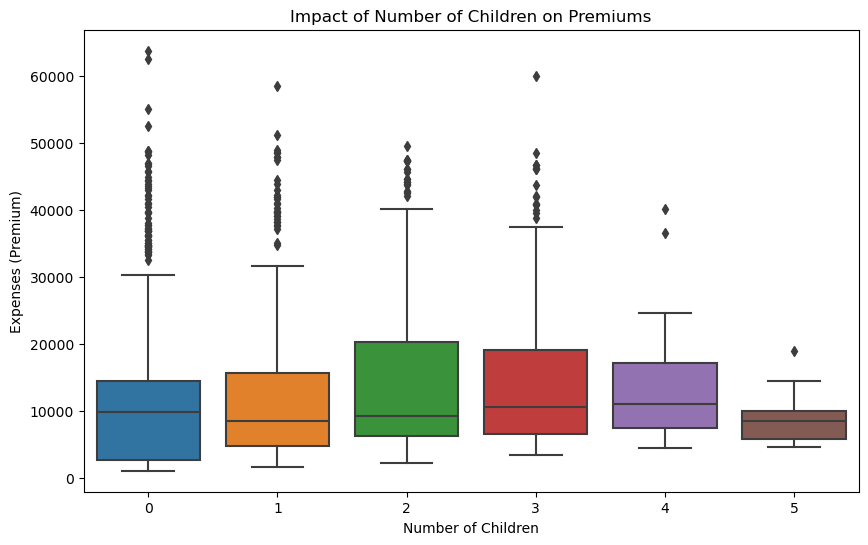

Mean Premiums by Number of Children:
children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64


In [127]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='children', y='expenses')
plt.title('Impact of Number of Children on Premiums')
plt.xlabel('Number of Children')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate mean expenses by number of children
mean_expenses_by_children = df.groupby('children')['expenses'].mean()
print('Mean Premiums by Number of Children:')
print(mean_expenses_by_children)


people who  have 3 children pay more premiums than rest

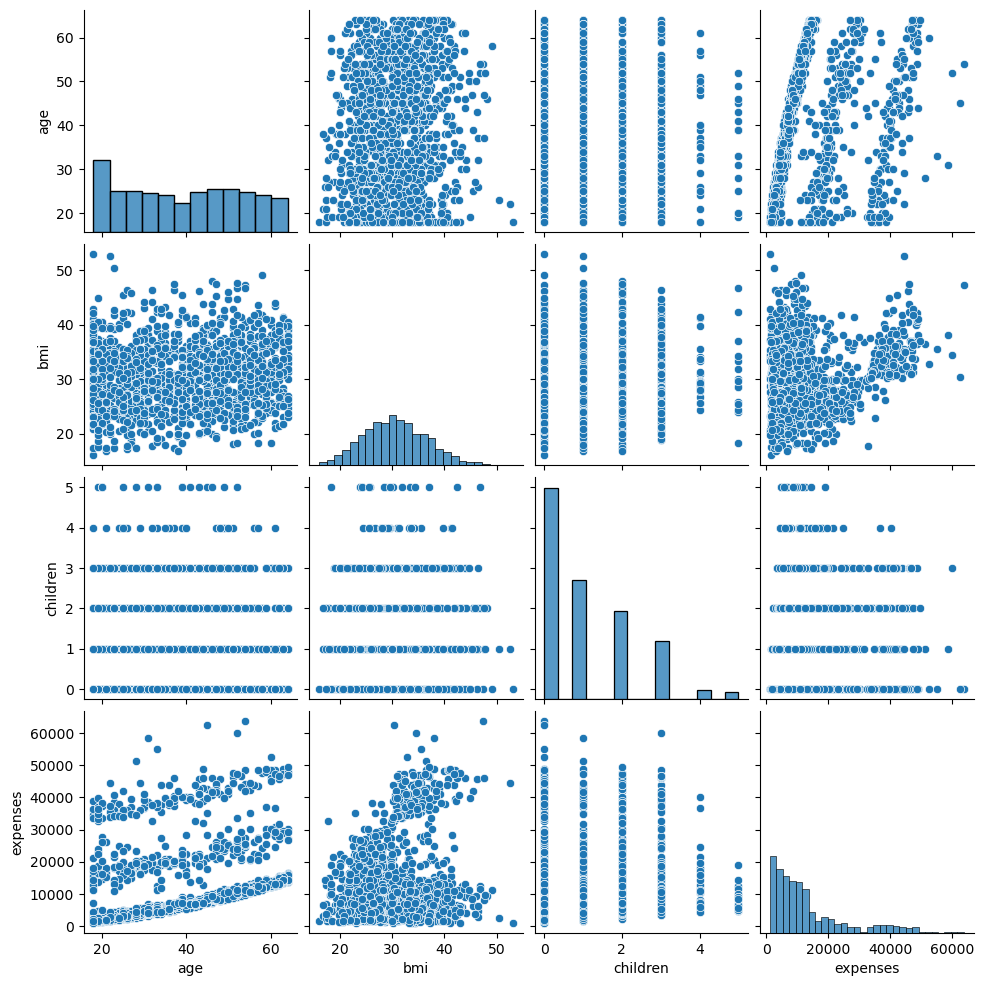

In [128]:
sns.pairplot(df)

<Axes: >

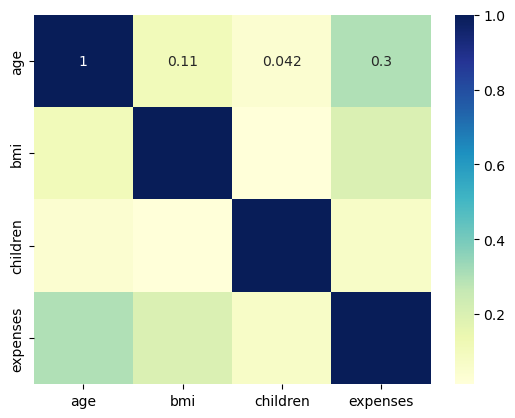

In [129]:
sns.heatmap(df[num_col].corr(),annot=True,cmap='YlGnBu')

In [130]:
df.shape

(1338, 7)

In [131]:
#Data preparation


In [132]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#data has no null values..If it had we would fill it with mean or median

In [133]:
df_num=df.select_dtypes(include=['int64','float64'])

In [134]:
# scaler=MinMaxScaler()
# numeric=scaler.fit_transform(df_num)

In [135]:
# import numpy as np
# df_num['log_expenses'] = np.log2(df_num['expenses'] +1)

# plt.figure(1)

# df_num['expenses'].plot(kind = 'hist')

# plt.figure(2)
# df_num['log_expenses'].plot(kind = 'hist')

# print(df)
# df_num = df_num.drop(['expenses'], axis=1)

In [136]:
df_num

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [137]:
# df_numeric=pd.DataFrame(numeric,columns=df_num.columns)

In [138]:
df_cat=df.select_dtypes(include=['object'])

In [139]:
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [140]:

onehotEnc = OneHotEncoder(sparse=False,dtype='int')

# Fit and transform the categorical data
df_cat_encoded = onehotEnc.fit_transform(df_cat)

# Get the feature names for the one-hot encoded columns
encoded_columns = onehotEnc.get_feature_names_out(df_cat.columns)

# Create a DataFrame with the encoded data and the appropriate column names
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=encoded_columns, dtype=int)

# Verify the result
print(df_cat_encoded.head())

   sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0           1         0          0           1                 0   
1           0         1          1           0                 0   
2           0         1          1           0                 0   
3           0         1          1           0                 0   
4           0         1          1           0                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [141]:
df_combined=pd.concat([df_num,df_cat_encoded],axis=1)

In [142]:
df_combined.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [143]:
df_combined.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

<Axes: >

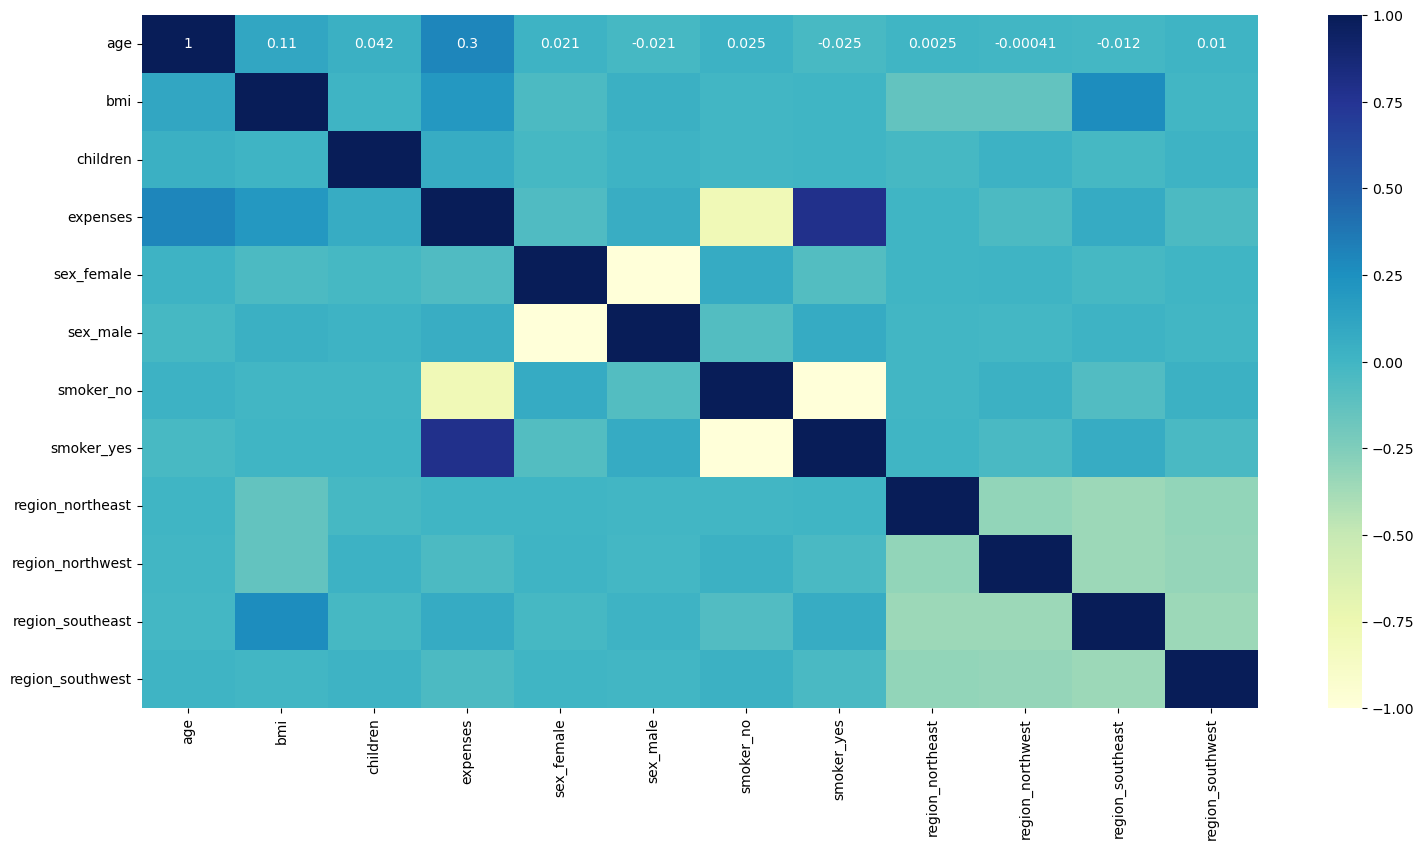

In [144]:
plt.figure(figsize=(18,9))
sns.heatmap(df_combined.corr(),annot=True,cmap='YlGnBu')

In [146]:
X=df_combined.drop(columns='expenses',axis=1)


In [147]:
y=df_combined['expenses']

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [150]:
models = {
    'linear':LinearRegression(),
    'Lasso':Lasso(alpha=1.0),
    'ridge':Ridge(),
    'random':RandomForestRegressor(random_state = 13),
    'xg':XGBRegressor(random_state = 42),
    'Gradient':GradientBoostingRegressor(random_state = 42),
    'knn': KNeighborsRegressor(),
    'ada':AdaBoostRegressor()
}

In [151]:
# function to get the evaluation metrics
def evaluation(x_train, x_test, y_train, y_test, models):
    results = {}
    for key,value in models.items():
        try:
            model = value.fit(x_train,y_train)
            y_predict_test = model.predict(x_test)
            y_pred_train = model.predict(x_train)
            
            r2_train = r2_score(y_true = y_train,
                                y_pred = y_pred_train)
            
            r2 = r2_score(y_true = y_test,
                        y_pred = y_predict_test)
            
            mse = mean_squared_error(y_true = y_test,
                                    y_pred = y_predict_test)
            mae = mean_absolute_error(y_true = y_test,
                                    y_pred = y_predict_test)
            results[key] = {
                'r2_score_train': r2_train,
                'r2_score_test': r2,
                'RMSE': np.sqrt(mse),
                'MAE': mae,
                'y_pred_test':y_predict_test,
                'y_pred_train':y_pred_train
            }
            print(key)
            print(f'r2_score_train : {r2_train}')
            print(f'r2_score : {r2}')
            print(f'RMSE : {np.sqrt(mse)}')
            print(f'MAE : {mae}')
            print("%%%%%%%%%%%")
        except Exception as e:
            print(f"Model {key} failed with error: {e}")
    return results
        


In [152]:
results=evaluation(X_train_scaled, X_test_scaled, y_train, y_test, models)

linear
r2_score_train : 0.7405577967898398
r2_score : 0.7833779732939238
RMSE : 5799.163331334736
MAE : 4173.9777985074625
%%%%%%%%%%%
Lasso
r2_score_train : 0.741750295735373
r2_score : 0.7835032063355198
RMSE : 5797.486789322493
MAE : 4181.122148985808
%%%%%%%%%%%
ridge
r2_score_train : 0.7417033963611656
r2_score : 0.7833178954043556
RMSE : 5799.967444717069
MAE : 4169.16634153544
%%%%%%%%%%%
random
r2_score_train : 0.9753830779054965
r2_score : 0.8574404766182719
RMSE : 4704.485677068184
MAE : 2603.433320945274
%%%%%%%%%%%
xg
r2_score_train : 0.9947061939172026
r2_score : 0.8418554578764859
RMSE : 4954.971232057128
MAE : 2874.172806068534
%%%%%%%%%%%
Gradient
r2_score_train : 0.8996661979272013
r2_score : 0.8793515653734473
RMSE : 4327.876696709201
MAE : 2412.366439389038
%%%%%%%%%%%
knn
r2_score_train : 0.8423228320095638
r2_score : 0.7857612494691275
RMSE : 5767.1738950005
MAE : 3602.497589552239
%%%%%%%%%%%
ada
r2_score_train : 0.8178975856955936
r2_score : 0.812178875397848
RMS

In [153]:
results['linear']['y_pred_test']

array([ 9728.,  6912., 36736.,  9216., 26496., 10240.,     0., 16640.,
        1664., 11008., 27392.,  9088.,  5376., 38400., 40192., 36992.,
       15360., 35968.,  9344., 31232.,  3328.,  9600.,  1664.,  7680.,
       11264., 13568., 14080.,  6016., 10624.,  2048.,  8704., 12928.,
        4608.,  3328.,  3840., 13568.,  1408.,  8320., 33024., 32512.,
        3456.,  3968., 13696., 11264.,  8832., 11520.,  5120.,  2688.,
       35456.,  9088., 16000.,  2304., 12160.,  1920., 13440., 13184.,
        4864., 31744., 12928., 13568., 13696., 10624., 15872.,  7680.,
       12544.,  3840., 25984., 11008.,  1920.,  5504., 11264., 12288.,
       11136.,  9216., 12032.,  6912.,  7808., 10624.,  6656.,  8320.,
        3712., 37120.,  5888., 31360., 34688., 35712.,  7040., 12672.,
        9856., 13952., 18432., 35328., 33536.,  6656., 31872.,  8960.,
       29312.,  3712., 28160.,  6528.,  5248.,  1280., 11520., 14592.,
       12288.,  4224.,  9984., 31744.,   384., 32896.,  2560., 10112.,
      

In [154]:
feature_names=['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
feature_names = X_train_scaled.columns

In [155]:
ridge=models['ridge']
ridge_importance = np.abs(ridge.coef_)  # Take the absolute value of the coefficients
ridge_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': ridge_importance
}).sort_values(by='Importance', ascending=False)

In [156]:
random_forest=models['random']
rf_importance = random_forest.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importance_df)


Random Forest Feature Importance:
             Feature  Importance
6         smoker_yes    0.369674
5          smoker_no    0.236551
1                bmi    0.208937
0                age    0.138088
2           children    0.020569
7   region_northeast    0.006343
8   region_northwest    0.004833
9   region_southeast    0.004295
4           sex_male    0.003870
3         sex_female    0.003770
10  region_southwest    0.003071


In [157]:
xgboost=models['xg']
xgb_importance = xgboost.feature_importances_
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(xgb_importance_df)



XGBoost Feature Importance:
             Feature  Importance
5          smoker_no    0.922837
1                bmi    0.023477
0                age    0.017224
7   region_northeast    0.008361
2           children    0.007957
8   region_northwest    0.007439
9   region_southeast    0.005149
10  region_southwest    0.004380
3         sex_female    0.003176
4           sex_male    0.000000
6         smoker_yes    0.000000


In [158]:
gboost=models['Gradient']
gb_importance = gboost.feature_importances_
gb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_importance
}).sort_values(by='Importance', ascending=False)

print("\nGradientBoost Feature Importance:")
print(gb_importance_df)



GradientBoost Feature Importance:
             Feature  Importance
5          smoker_no    0.369857
6         smoker_yes    0.306747
1                bmi    0.187159
0                age    0.117997
2           children    0.011119
7   region_northeast    0.003195
8   region_northwest    0.001661
10  region_southwest    0.001067
9   region_southeast    0.000515
3         sex_female    0.000480
4           sex_male    0.000204


In [159]:
def plot_feature_importance(importance_df, title):
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.title(title)
    plt.xlabel('Importance')
    plt.show()

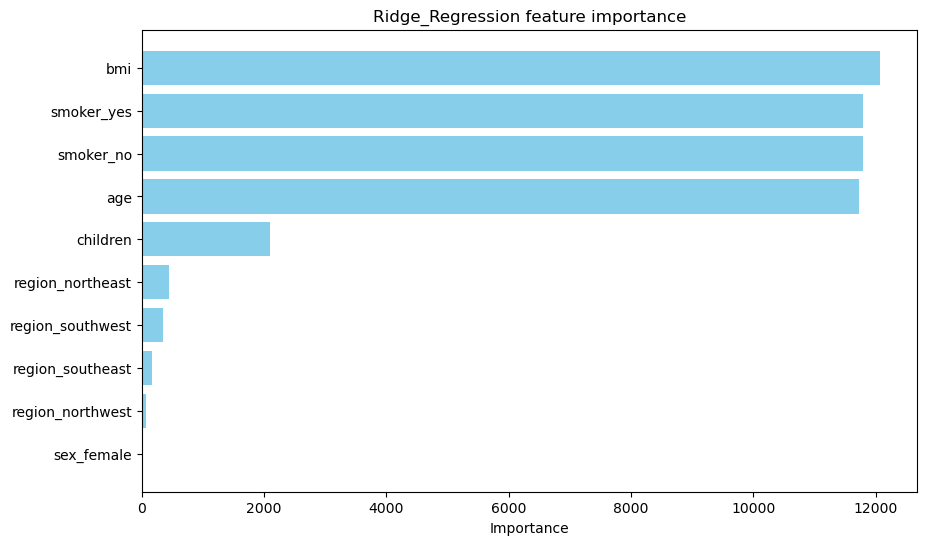

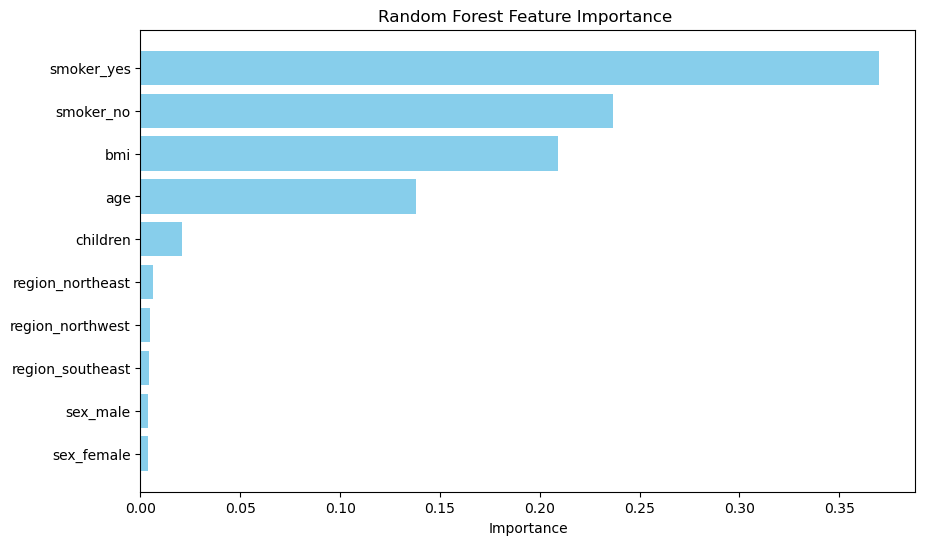

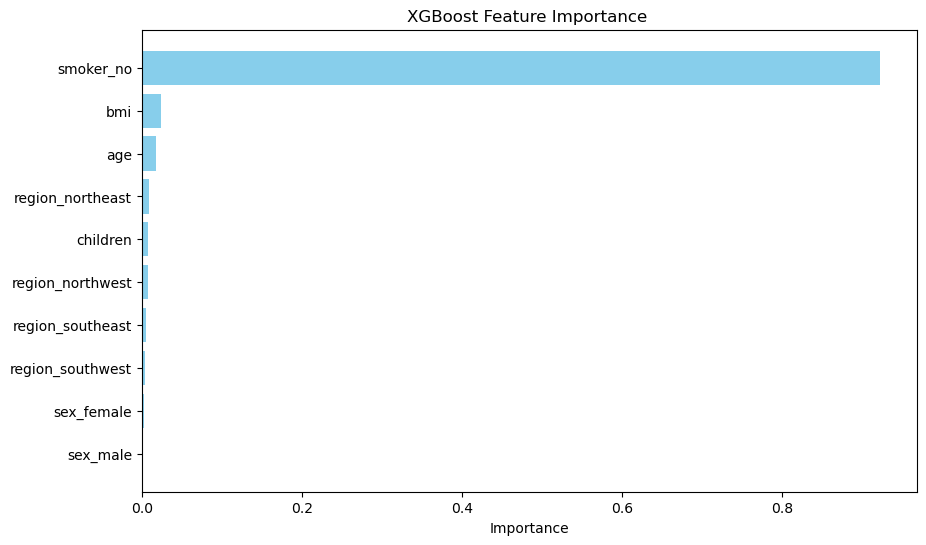

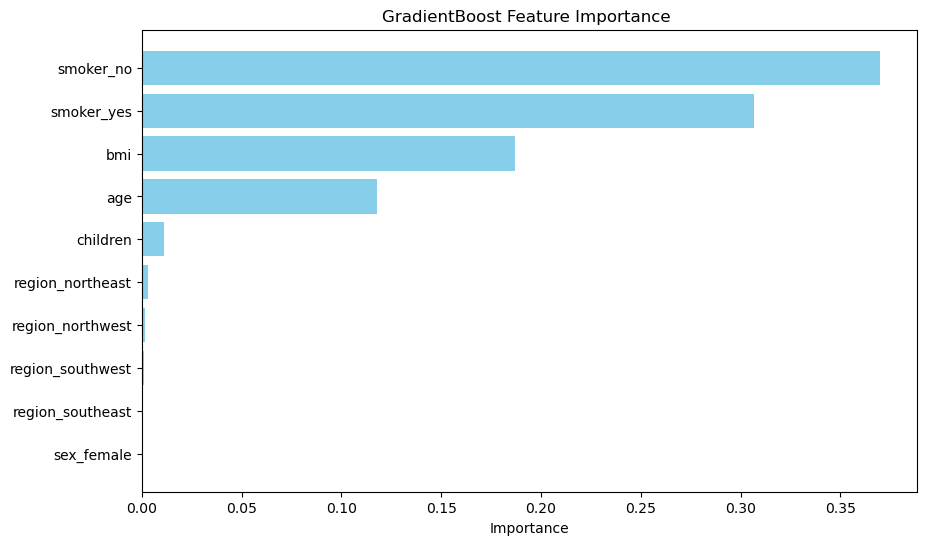

In [160]:
plot_feature_importance(ridge_importance_df,'Ridge_Regression feature importance')
plot_feature_importance(rf_importance_df, 'Random Forest Feature Importance ')
plot_feature_importance(xgb_importance_df, 'XGBoost Feature Importance ')
plot_feature_importance(gb_importance_df, 'GradientBoost Feature Importance ')


In [ ]:
#Checking the assumptions of linear regression

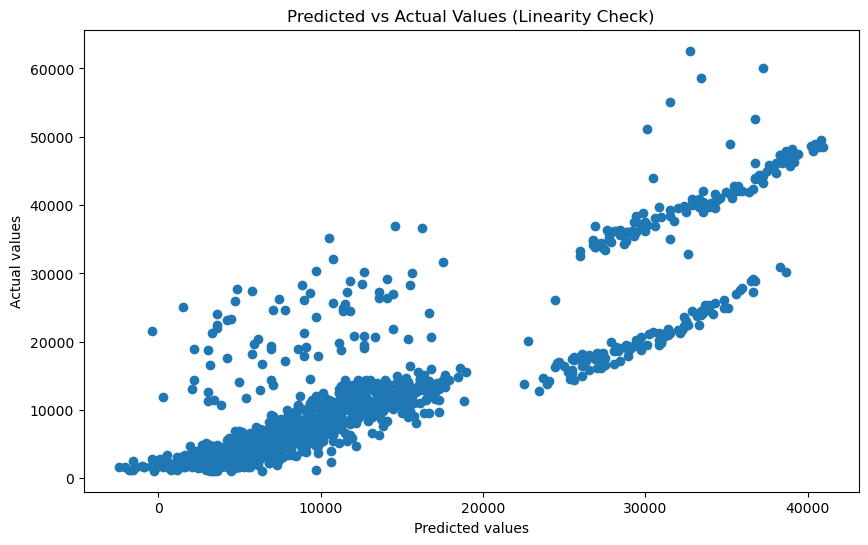

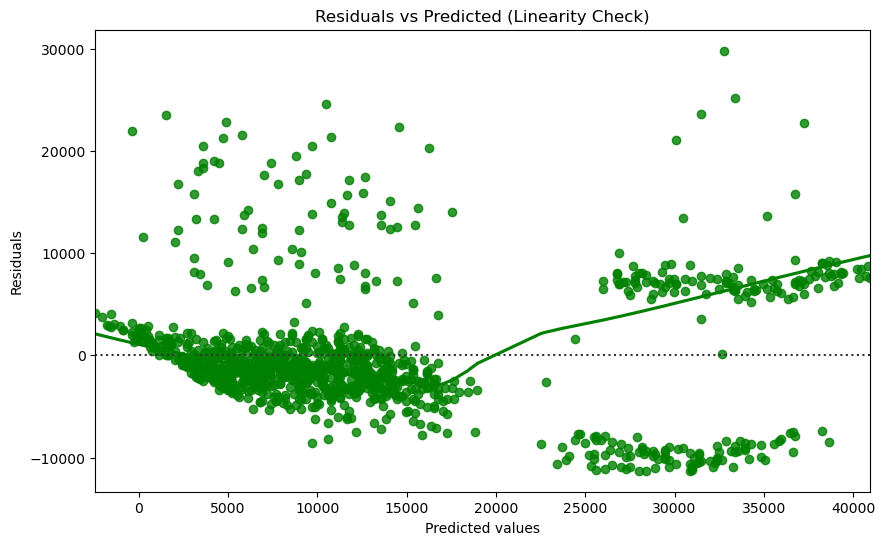

In [161]:
# Plot predicted vs actual values to check for linearity
plt.figure(figsize=(10, 6))
plt.scatter(results['linear']['y_pred_train'], y_train)
plt.title('Predicted vs Actual Values (Linearity Check)')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

# Residual plot (Residuals should have no pattern)
residuals = y_train- results['linear']['y_pred_train']
plt.figure(figsize=(10, 6))
sns.residplot(x=results['linear']['y_pred_train'], y=residuals, lowess=True, color="g")
plt.title('Residuals vs Predicted (Linearity Check)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

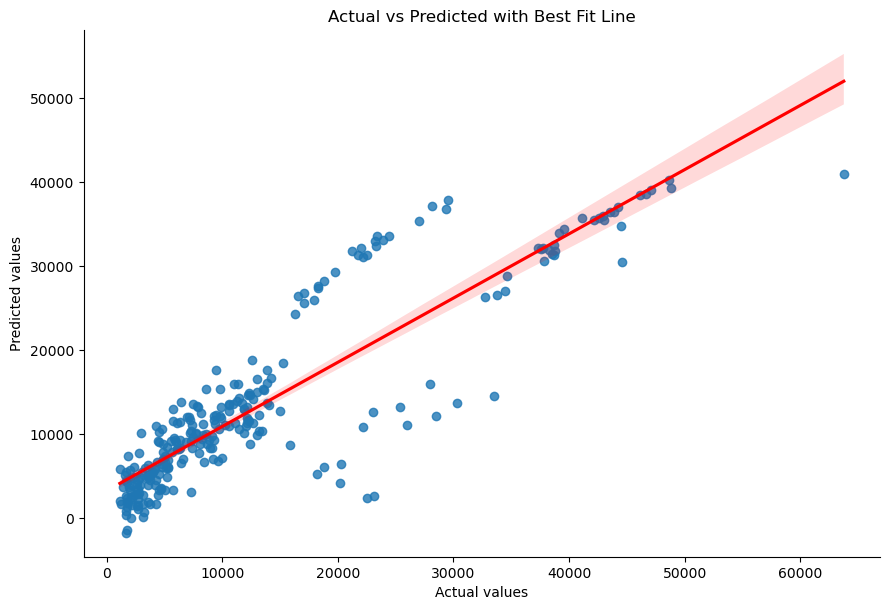

In [162]:
df_results = pd.DataFrame({
    'Predicted':results['linear']['y_pred_test'],  # Replace with your predicted values
    'Actual': y_test               # Replace with your actual target values
})

# Plotting the relplot (scatterplot) with the best fit line
sns.lmplot(x='Actual', y='Predicted', data=df_results, height=6, aspect=1.5, line_kws={"color": "red"})
plt.title('Actual vs Predicted with Best Fit Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [163]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Add a constant for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels for the Durbin-Watson test
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Durbin-Watson test
dw = durbin_watson(model_sm.resid)
print(f'Durbin-Watson Test: {dw}')


Durbin-Watson Test: 2.085517662679384


Interpretation: Values around 2 indicate no autocorrelation (good). Values close to 0 suggest positive autocorrelation, and values near 4 suggest negative autocorrelation.

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


             Feature       VIF
0                age  1.023104
1                bmi  1.095046
2           children  1.005646
3         sex_female       inf
4           sex_male       inf
5          smoker_no       inf
6         smoker_yes       inf
7   region_northeast       inf
8   region_northwest       inf
9   region_southeast       inf
10  region_southwest       inf


C:\Users\madhu\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Interpretation: A VIF above 5 or 10 indicates high multicollinearity, which may affect the model's reliability.

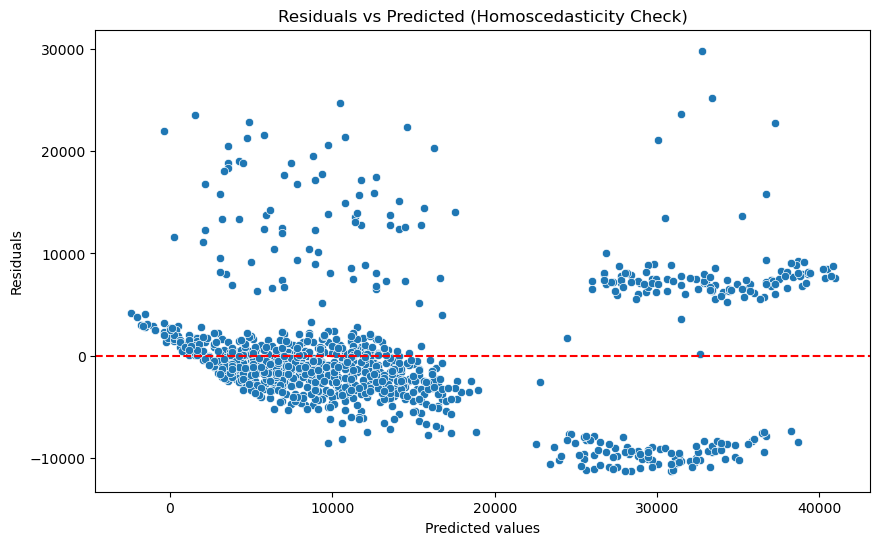

In [165]:
df_residuals = pd.DataFrame({
    'Predicted': results['linear']['y_pred_train'],  # Replace with your predicted values
    'Residuals': residuals      # Replace with your residual values
})

# Plotting the residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=df_residuals)
plt.title('Residuals vs Predicted (Homoscedasticity Check)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0 for reference
plt.show()

In [166]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model_sm.resid, model_sm.model.exog)

# bp_test[0] is the test statistic, and bp_test[1] is the p-value
print(f'Breusch-Pagan Test Statistic: {bp_test[0]}')
print(f'Breusch-Pagan Test p-value: {bp_test[1]}')


Breusch-Pagan Test Statistic: 93.2062057437564
Breusch-Pagan Test p-value: 3.913746396763412e-15


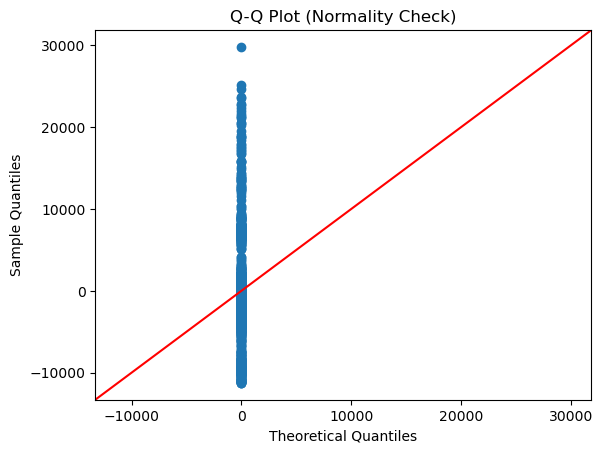

In [167]:
# Q-Q plot to check for normality of residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot (Normality Check)')
plt.show()


In [168]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test[0]}')
print(f'Shapiro-Wilk Test p-value: {shapiro_test[1]}')


Shapiro-Wilk Test Statistic: 0.8964110016822815
Shapiro-Wilk Test p-value: 3.0855172646120266e-26


In [169]:
import pickle
def get_best_model_and_save(results, models,filename='best_model.pkl'):
    # Extract R2 scores from the evaluation results
    best_r2_score = -float('inf')
    best_model_name = None
    best_model = None

    for model_name, metrics in results.items():
        r2_score_test = metrics['r2_score_test']
        if r2_score_test > best_r2_score:
            best_r2_score = r2_score_test
            best_model_name = model_name
            best_model = models[model_name]
    print(f'Best Model: {best_model_name} with R² Score: {best_r2_score}')
     # Save the best model to a pickle file
    with open(filename, 'wb') as file:
        pickle.dump(best_model, file)
        print(f'Best model saved to {filename}')

    return best_model_name, best_r2_score

In [170]:
best_model_name, best_r2_score = get_best_model_and_save(results, models)

Best Model: Gradient with R² Score: 0.8793515653734473
Best model saved to best_model.pkl


In [171]:
pickle.dump(onehotEnc,open('onehotEnc.pkl','wb'))
